In [171]:
import uproot4 as upr
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import particle
import ROOT
import math
import numpy as np
import sys
import glob
sys.path.append('/storage/gpfs_data/neutrino/users/gi/sand-physics/notebook/python_tools')
from ROOT_tools import ROOT_tools
from MultiPlotter import MultiPlotter
from ROOT2Pandas import Converter
from SampleManager import Sample, Manager
tool = ROOT_tools()

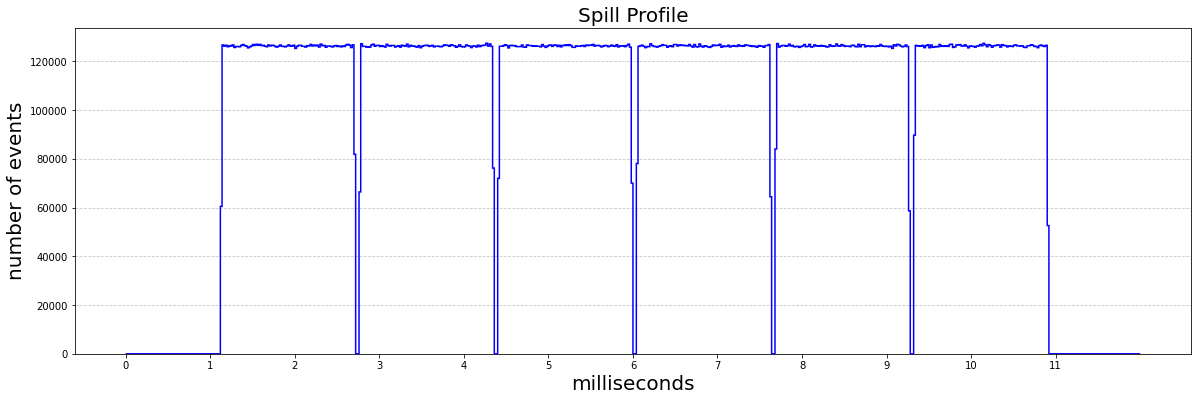

In [201]:
file = "/storage/gpfs_data/neutrino/users/gi/prod-scripts/spill_profile.root"
hist = upr.open(file)['spill_profile;1']

# Estrai i dati dell'istogramma
# `values` contiene i conteggi nei bin e `edges` contiene i bordi dei bin
values = hist.values()  # Conteggi nei bin
edges = hist.axis().edges()         # Bordi dei bin

# Calcola le posizioni centrali dei bin per il plotting
bin_centers = (edges[:-1] + edges[1:]) / 2

# Crea il grafico
plt.figure(figsize=(20, 6))
plt.hist(edges[:-1]*1e6, bins=edges*1e6, weights=values, histtype='step', color='blue', linewidth=1.5)
plt.xlabel("milliseconds", fontsize=20)
plt.ylabel("number of events", fontsize=20)
plt.title("Spill Profile", fontsize=20)
plt.xticks(np.arange(0,12))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostra il grafico
plt.show()

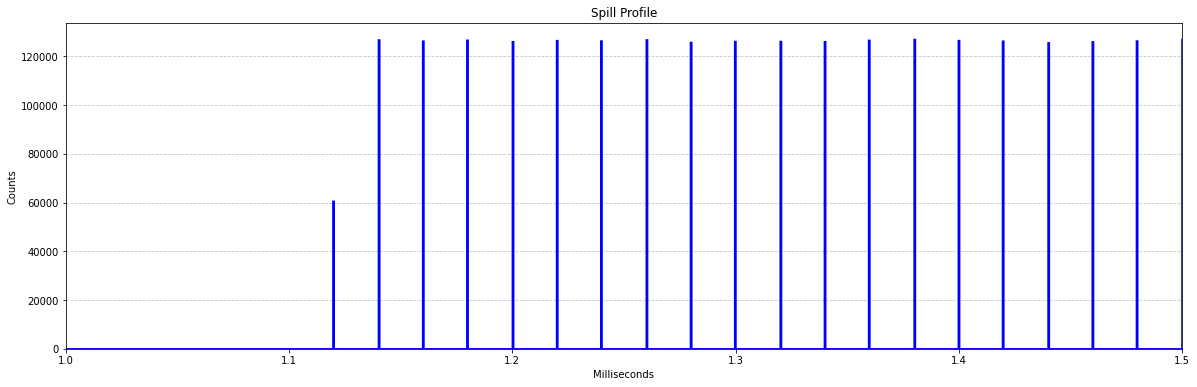

In [196]:
file = "/storage/gpfs_data/neutrino/users/gi/prod-scripts/spill_profile.root"
hist = upr.open(file)['spill_profile;1']

# Estrai i dati dell'istogramma
values = hist.values()              # Conteggi nei bin
edges = hist.axis().edges()         # Bordi dei bin

# Calcola il range complessivo
range_min, range_max = edges[0], edges[-1]

# Definisci il nuovo numero di bin e calcola i nuovi bordi
n_bins_new = 20000
new_edges = np.linspace(range_min, range_max, n_bins_new + 1)  # +1 perché gli edges includono anche il bordo destro

# Ribinna i valori esistenti ai nuovi bordi dei bin
new_values, _ = np.histogram(edges[:-1], bins=new_edges, weights=values)

# Crea il grafico con i dati ribinnati, scalando gli edge dei bin per mostrare millisecondi
plt.figure(figsize=(20, 6))
plt.hist(new_edges[:-1]*1e6, bins=new_edges*1e6, weights=new_values, histtype='step', color='blue', linewidth=1.5)
plt.xlabel("Milliseconds")
plt.ylabel("Counts")
plt.title("Spill Profile")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xlim(1,1.5)
# Mostra il grafico
plt.show()

In [141]:
pdg_to_name = {
    12: "neutrino_e",
    14: "neutrino_mu",
    13: "muon",
    13: "muon",
    2112: "neutron",
    2212: "proton",
    211: "pi+-",
    111: "pi0",
    22: "photon",
    11: "e+-",
    311: "K0",
    321: "K+-",
    213: "rho+-",
}

def pdg_to_particle_name(pdg_series):
    return pdg_series.map(pdg_to_name).fillna("other")

In [64]:
file_trj = "/storage/gpfs_data/neutrino/users/gi/sand-physics/production_spill_reverse_volSAND/SAND_opt3_DRIFT1_reverse_volSAND/sand-drift-events.0.to.10.analysed.trj.root"
file_cells = "/storage/gpfs_data/neutrino/users/gi/sand-physics/production_spill_reverse_volSAND/SAND_opt3_DRIFT1_reverse_volSAND/sand-drift-events.0.to.10.analysed.cells.root"

In [133]:
converter_trj = Converter([file_trj], "trajectories")
converter_cells = Converter([file_cells], "cells")

In [134]:
columns_trajectories = [
    "trajectories_spill_number",
    "trajectories_id",
    "trajectories_pdg",
    # "trajectories_name",
    # "trajectories_starting_volume",
    "trajectories_ecal_edep",
    "trajectories_earliest_hit_ecal",
    "trajectories_latest_hit_ecal",
    "trajectories_TOF2ECAL",
]


In [143]:
trajectories = converter_trj.CreatePandas(
    columns = columns_trajectories,
    rename = True,
    indices = ['entry','subentry']
).droplevel(level=2).rename_axis(index={'entry': 'spill', 'subentry': 'index'})

trajectories['particle_name'] = pdg_to_particle_name(abs(trajectories['trajectories_pdg']))
trajectories

DataFrame from file /storage/gpfs_data/neutrino/users/gi/sand-physics/production_spill_reverse_volSAND/SAND_opt3_DRIFT1_reverse_volSAND/sand-drift-events.0.to.10.analysed.trj.root has MultiIndex structure, keeping entry and subentry as columns
Unmapped PDG code: 3222
Unmapped PDG code: 1000060120
Unmapped PDG code: 1000060120
Unmapped PDG code: 1000060120
Unmapped PDG code: 3122
Unmapped PDG code: 1000060120
Unmapped PDG code: 1000060120
Unmapped PDG code: 1000060120
Unmapped PDG code: 1000060120
Unmapped PDG code: 1000060120
Unmapped PDG code: 1000060120
Unmapped PDG code: 1000060120
Unmapped PDG code: 1000060120
Unmapped PDG code: 1000060120
Unmapped PDG code: 1000060120
Unmapped PDG code: 1000060120
Unmapped PDG code: 130
Unmapped PDG code: 1000060120
Unmapped PDG code: 1000020040
Unmapped PDG code: 1000020040
Unmapped PDG code: 1000020040
Unmapped PDG code: 1000060120
Unmapped PDG code: 1000060120
Unmapped PDG code: 1000060120
Unmapped PDG code: 1000060120
Unmapped PDG code: 100006

trajectories_spill_number  trajectories_id  trajectories_pdg  \
spill index                                                                 
0     0                              0                0                13   
      1                              0                1              2112   
      2                              0                2               211   
      3                              0                3               111   
      4                              0                4              2212   
...                                ...              ...               ...   
89    6771                           8             6771              2112   
      6772                           8             6772               -11   
      6773                           8             6773                22   
      6774                           8             6774                22   
      6775                           8             6775               -11   

             trajectories_ecal_edep  trajectories_earliest_hit_ecal_x  \
spill index                                                             
0     0                   32.245749                            -999.0   
      1                   86.515463                            -999.0   
      2                   37.979159                            -999.0   
      3                    0.000000                            -999.0   
      4                    0.000000                            -999.0   
...                             ...                               ...   
89    6771                 0.000000                            -999.0   
      6772                 0.000000                            -999.0   
      6773                 0.000000                            -999.0   
      6774                 0.000000                            -999.0   
      6775                 0.000000                            -999.0   

             trajectories_earliest_hit_ecal_y  \
spill index                                     
0     0                                -999.0   
      1                                -999.0   
      2                                -999.0   
      3                                -999.0   
      4                                -999.0   
...                                       ...   
89    6771                             -999.0   
      6772                             -999.0   
      6773                             -999.0   
      6774                             -999.0   
      6775                             -999.0   

             trajectories_earliest_hit_ecal_z  \
spill index                                     
0     0                                -999.0   
      1                                -999.0   
      2                                -999.0   
      3                                -999.0   
      4                                -999.0   
...                                       ...   
89    6771                             -999.0   
      6772                             -999.0   
      6773                             -999.0   
      6774                             -999.0   
      6775                             -999.0   

             trajectories_earliest_hit_ecal_t  trajectories_latest_hit_ecal_x  \
spill index                                                                     
0     0                                -999.0                          -999.0   
      1                                -999.0                          -999.0   
      2                                -999.0                          -999.0   
      3                                -999.0                          -999.0   
      4                                -999.0                          -999.0   
...                                       ...                             ...   
89    6771                             -999.0                          -999.0   
      6772                             -999.0           

In [144]:
trajectories_manager = Manager(trajectories, "trajectories", reference_index="spill")

In [166]:
trajectories_manager.DefineSample("ecal_trajectories", "trajectories_ecal_edep > 0.1")
trajectories_manager.DefineSample("neutrons_trajectories", "trajectories_ecal_edep > 0.1 & trajectories_pdg == 2112")

In [167]:
ecal_trajectories = trajectories_manager.GetSample("ecal_trajectories")
neutrons_trajectories = trajectories_manager.GetSample("neutrons_trajectories")

In [147]:
ecal_trajectories.dataframe

trajectories_spill_number  trajectories_id  trajectories_pdg  \
spill index                                                                 
0     0                              0                0                13   
      1                              0                1              2112   
      2                              0                2               211   
      5                              0                5               -13   
      6                              0                6              2112   
...                                ...              ...               ...   
89    5863                           8             5863              -211   
      5930                           8             5930                22   
      5992                           8             5992                22   
      6707                           8             6707                22   
      6708                           8             6708                22   

             trajectories_ecal_edep  trajectories_earliest_hit_ecal_x  \
spill index                                                             
0     0                   32.245749                            -999.0   
      1                   86.515463                            -999.0   
      2                   37.979159                            -999.0   
      5                  177.663678                            -999.0   
      6                   12.224922                            -999.0   
...                             ...                               ...   
89    5863                 1.628246                            -999.0   
      5930                26.528784                            -999.0   
      5992                 0.483963                            -999.0   
      6707                26.931649                            -999.0   
      6708                19.441619                            -999.0   

             trajectories_earliest_hit_ecal_y  \
spill index                                     
0     0                                -999.0   
      1                                -999.0   
      2                                -999.0   
      5                                -999.0   
      6                                -999.0   
...                                       ...   
89    5863                             -999.0   
      5930                             -999.0   
      5992                             -999.0   
      6707                             -999.0   
      6708                             -999.0   

             trajectories_earliest_hit_ecal_z  \
spill index                                     
0     0                                -999.0   
      1                                -999.0   
      2                                -999.0   
      5                                -999.0   
      6                                -999.0   
...                                       ...   
89    5863                             -999.0   
      5930                             -999.0   
      5992                             -999.0   
      6707                             -999.0   
      6708                             -999.0   

             trajectories_earliest_hit_ecal_t  trajectories_latest_hit_ecal_x  \
spill index                                                                     
0     0                                -999.0                          -999.0   
      1                                -999.0                          -999.0   
      2                                -999.0                          -999.0   
      5                                -999.0                          -999.0   
      6                                -999.0                          -999.0   
...                                       ...                             ...   
89    5863                             -999.0                          -999.0   
      5930                             -999.0           

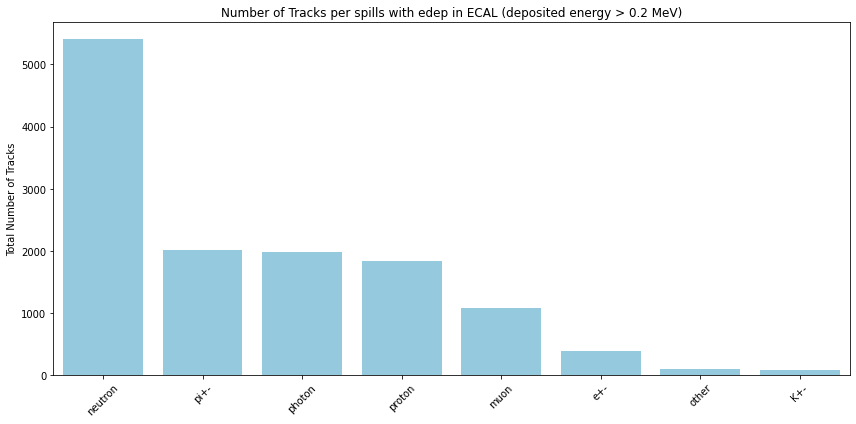

In [148]:
# Supponiamo che il tuo DataFrame si chiami df

# Raggruppa per 'spill' e 'particle_name' e conta le occorrenze
counts = ecal_trajectories.dataframe.groupby(['spill', 'particle_name']).size().reset_index(name='count')

total_counts = counts.groupby('particle_name')['count'].sum().reset_index()

total_counts = total_counts.sort_values(by='count', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=total_counts, x='particle_name', y='count', color='skyblue')

plt.title('Number of Tracks per spills with edep in ECAL (deposited energy > 0.2 MeV)')
plt.xlabel('')
plt.ylabel('Total Number of Tracks')
plt.xticks(rotation=45)
plt.tight_layout()



In [149]:
columns_cells = [
    # "file_name",
    "spill_number",
    "cell_mod",
    "cell_id",
    "cell_x",
    "cell_y",
    "cell_z",
    "is_complete",
    "track_id_pmt1_hit",
    "track_id_pmt2_hit",
    "track_pdg_pmt1_hit",
    "track_pdg_pmt2_hit",
    "true_hit1",
    "true_hit2",
    "true_edep1",
    "true_edep2",
    "reco_hit",
    "reco_edep",
]

In [150]:
cells = converter_cells.CreatePandas(
    columns = columns_cells,
    rename = True,
    indices = ['entry','subentry']
).droplevel(level=2).rename_axis(index={'entry': 'spill', 'subentry': 'index'})

cells

DataFrame from file /storage/gpfs_data/neutrino/users/gi/sand-physics/production_spill_reverse_volSAND/SAND_opt3_DRIFT1_reverse_volSAND/sand-drift-events.0.to.10.analysed.cells.root has MultiIndex structure, keeping entry and subentry as columns


spill_number  cell_mod  cell_id        cell_x       cell_y  \
spill index                                                               
0     0                 0        40   140005 -1.712000e+03 -2384.730000   
      1                 0        40   140006 -1.712000e+03 -2384.730000   
      2                 0        40   140007 -1.712000e+03 -2384.730000   
      3                 0        40   140008 -1.712000e+03 -2384.730000   
      4                 0        40   140108 -1.756000e+03 -2384.730000   
...                   ...       ...      ...           ...          ...   
89    245               8        23   223403  4.536223e-13  -287.993134   
      246               8        23   223404  4.536223e-13  -275.514042   
      247               8        23   223405  4.536223e-13  -263.034950   
      248               8        23   223407  4.536223e-13  -238.076767   
      249               8        23   223411  4.536223e-13  -188.160401   

                   cell_z  is_complete  track_id_pmt1_hit  track_id_pmt2_hit  \
spill index                                                                    
0     0      22154.444444            1                  5                  5   
      1      22198.888889            1                  5                  5   
      2      22243.333333            1                  5                  5   
      3      22287.777778            1                  5                  5   
      4      22287.777778            1                  5                  5   
...                   ...          ...                ...                ...   
89    245    24596.609866            1                 97                 97   
      246    24550.037262            1                 97                 97   
      247    24503.464658            1                 97                 97   
      248    24410.319451            1                 29                 29   
      249    24224.029036            1                 28                 28   

             track_pdg_pmt1_hit  ...  true_hit2_y   true_hit2_z  true_hit2_t  \
spill index                      ...                                           
0     0                    2212  ... -2150.044240  22149.045497  1954.889207   
      1                    2212  ... -2269.068318  22178.488136  1934.908332   
      2                    2212  ... -2304.559950  22233.958685  1934.843076   
      3                    2212  ... -2002.035803  22298.492403  1949.127310   
      4                    2212  ... -2314.504059  22274.206879  1934.990447   
...                         ...  ...          ...           ...          ...   
89    245                  -211  ...  -295.362628  24588.638407  4115.693285   
      246                  -211  ...  -258.875297  24538.054134  4103.238682   
      247                  -211  ...  -263.116371  24524.331819  4104.687298   
      248                  -211  ...  -207.130448  24396.467481  2018.943275   
      249                  2112  ...  -185.178510  24216.184614  1484.730007   

             true_edep1  true_edep2   reco_hit_x   reco_hit_y    reco_hit_z  \
spill index                                                                   
0     0        0.386306    0.386306 -1712.000000 -2397.379791  22154.444444   
      1        0.742369    0.821250 -1712.000000 -2378.069839  22198.888889   
      2        0.073684    0.073684 -1712.000000 -2542.501235  22243.333333   
      3        0.326220    0.326220 -1712.000000 -2290.148065  22287.777778   
      4        0.182416    0.119315 -1756.000000 -2256.849373  22287.777778   
...                 ...         ...          ...          ...           ...   
89    245      0.066201    0.066201    18.190262  -287.993134  24596.609866   
      246      0.331465    0.331465   -81.549466  -275.514042  24550.037262   
      247      0.229636    0.229636    -5.126829  -263.034950  24503.464658   
      248      0.269243    0.269243   -29.305021  -238.076767  24410.319451   
      2

In [151]:
cells_manager = Manager(cells, "cells", reference_index="spill")

In [152]:
cells_manager.DefineSample("cells_fired_by_on_trajectory", "track_id_pmt1_hit == track_id_pmt2_hit")

In [153]:
cells_fired_by_on_trajectory = cells_manager.GetSample("cells_fired_by_on_trajectory")
cells_fired_by_on_trajectory.dataframe['track_pdg_pmt1_hit'] = pdg_to_particle_name(abs(cells_fired_by_on_trajectory.dataframe['track_pdg_pmt1_hit']))

Unmapped PDG code: 310
Unmapped PDG code: 310
Unmapped PDG code: 310
Unmapped PDG code: 310
Unmapped PDG code: 310
Unmapped PDG code: 310
Unmapped PDG code: 310
Unmapped PDG code: 310
Unmapped PDG code: 310
Unmapped PDG code: 310
Unmapped PDG code: 310
Unmapped PDG code: 310
Unmapped PDG code: 310
Unmapped PDG code: 310
Unmapped PDG code: 310
Unmapped PDG code: 310
Unmapped PDG code: 310
Unmapped PDG code: 310
Unmapped PDG code: 310
Unmapped PDG code: 310
Unmapped PDG code: 310
Unmapped PDG code: 310
Unmapped PDG code: 310
Unmapped PDG code: 310
Unmapped PDG code: 130
Unmapped PDG code: 130
Unmapped PDG code: 130
Unmapped PDG code: 130
Unmapped PDG code: 130
Unmapped PDG code: 130
Unmapped PDG code: 310
Unmapped PDG code: 310
Unmapped PDG code: 310
Unmapped PDG code: 310
Unmapped PDG code: 310
Unmapped PDG code: 130
Unmapped PDG code: 130
Unmapped PDG code: 310
Unmapped PDG code: 3122
Unmapped PDG code: 3122
Unmapped PDG code: 3122
Unmapped PDG code: 3122
Unmapped PDG code: 3122
Unmapp

/home/NEUTRINO/gianfrancoingratta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


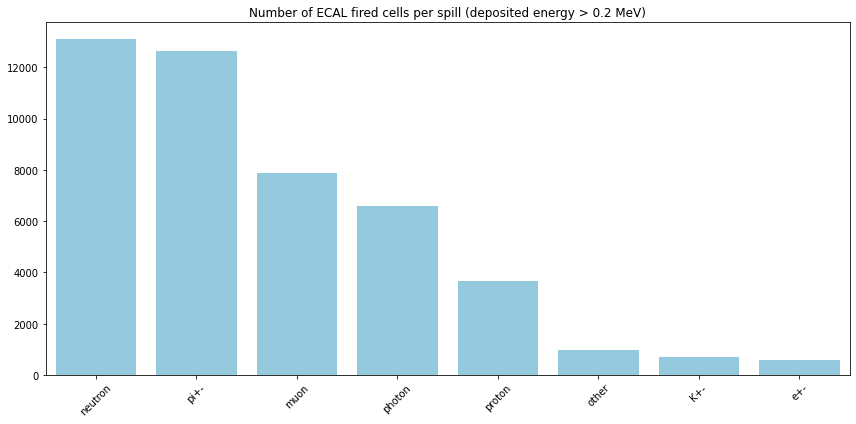

In [157]:
counts = cells_fired_by_on_trajectory.dataframe.groupby(['spill', 'track_pdg_pmt1_hit']).size().reset_index(name='count')

total_counts = counts.groupby('track_pdg_pmt1_hit')['count'].sum().reset_index()

total_counts = total_counts.sort_values(by='count', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=total_counts, x='track_pdg_pmt1_hit', y='count', color='skyblue')

plt.title('Number of ECAL fired cells per spill (deposited energy > 0.2 MeV)')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.tight_layout()

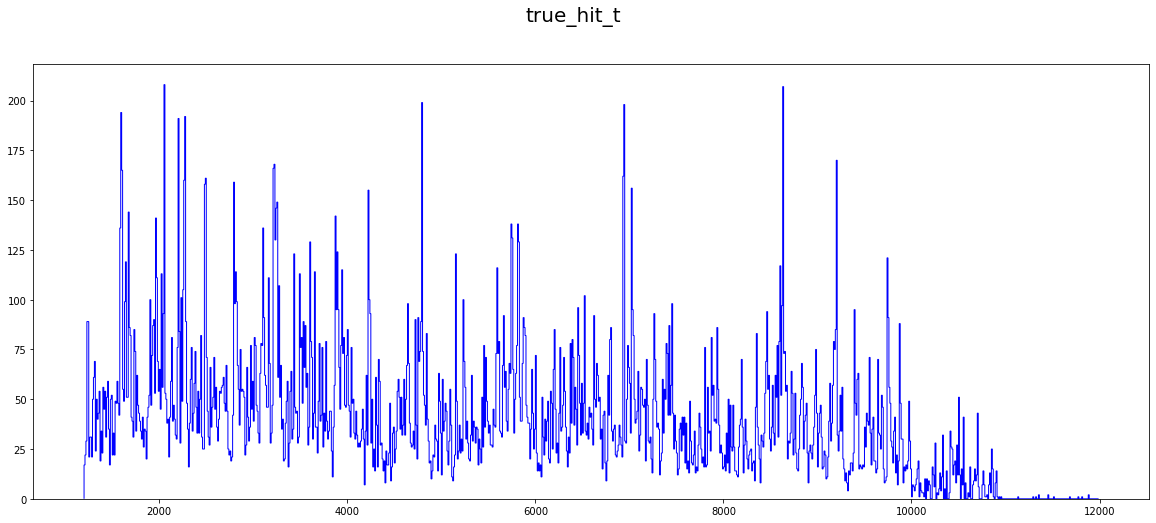

In [163]:
plotter = MultiPlotter(nrows=1, ncols=1, figsize=(20, 8), suptitle=r"true_hit_t")

plotter.plot_hist(
    data=cells_fired_by_on_trajectory.dataframe['true_hit1_t'],
    bins=np.arange(1200, 12000, 10),
    label='',
    color='blue',
)


In [164]:
cells_fired_by_on_trajectory.dataframe.columns

Index(['spill_number', 'cell_mod', 'cell_id', 'cell_x', 'cell_y', 'cell_z',
       'is_complete', 'track_id_pmt1_hit', 'track_id_pmt2_hit',
       'track_pdg_pmt1_hit', 'track_pdg_pmt2_hit', 'true_hit1_x',
       'true_hit1_y', 'true_hit1_z', 'true_hit1_t', 'true_hit2_x',
       'true_hit2_y', 'true_hit2_z', 'true_hit2_t', 'true_edep1', 'true_edep2',
       'reco_hit_x', 'reco_hit_y', 'reco_hit_z', 'reco_hit_t', 'reco_edep'],
      dtype='object')